In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
%reload_ext watermark
%watermark -a "Pedro Marcello" 

Author: Pedro Marcello



## Carregando e Compreendendo os Dados

In [3]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [4]:
df.shape

(6607, 20)

In [5]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [6]:
df.sample(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6018,19,92,Low,Medium,Yes,7,70,Low,Yes,2,High,Medium,Private,Positive,2,No,College,Near,Male,69
724,21,73,Medium,Medium,No,6,85,Medium,Yes,6,Medium,High,Public,Neutral,5,No,College,Near,Male,70
2669,24,89,Medium,High,Yes,6,63,Medium,Yes,2,High,Medium,Private,Positive,3,No,College,Near,Male,72
4419,7,84,Medium,Medium,Yes,5,96,Medium,No,1,Low,Low,Public,Positive,3,Yes,High School,Near,Male,62
4842,24,93,Medium,High,No,4,56,Low,Yes,4,Low,High,Public,Negative,2,No,Postgraduate,Moderate,Female,71
4306,16,66,High,High,No,5,68,High,No,2,Low,Medium,Public,Positive,5,No,Postgraduate,Moderate,Male,65
5451,21,80,High,Low,Yes,6,52,Medium,Yes,1,Low,Medium,Public,Negative,4,No,High School,Near,Male,65
1023,33,64,Medium,Low,Yes,10,76,Low,Yes,2,High,High,Private,Neutral,3,No,High School,Near,Male,68
4163,9,86,High,High,No,8,80,Medium,Yes,1,Low,Medium,Public,Positive,5,No,College,Far,Female,67
1656,21,69,Medium,Medium,No,7,66,High,Yes,1,Medium,Medium,Private,Neutral,4,No,High School,Far,Female,64


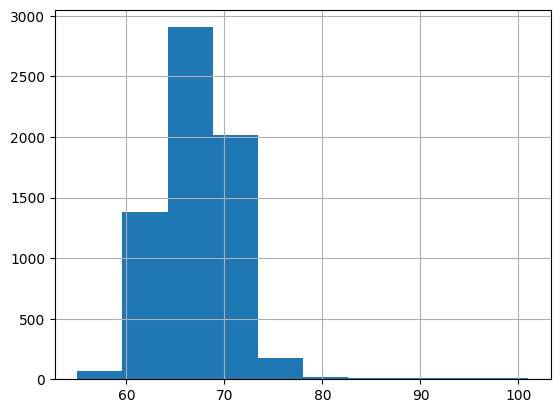

In [7]:
df['Exam_Score'].hist();

In [8]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Detectando Valores Ausentes

In [9]:
valores_ausentes = df.isnull().sum().sort_values(ascending = False)

In [10]:
print(valores_ausentes)

Parental_Education_Level      90
Teacher_Quality               78
Distance_from_Home            67
Hours_Studied                  0
Access_to_Resources            0
Parental_Involvement           0
Attendance                     0
Extracurricular_Activities     0
Motivation_Level               0
Internet_Access                0
Previous_Scores                0
Sleep_Hours                    0
Family_Income                  0
Tutoring_Sessions              0
School_Type                    0
Peer_Influence                 0
Learning_Disabilities          0
Physical_Activity              0
Gender                         0
Exam_Score                     0
dtype: int64


In [11]:
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / df.shape[0] 

In [12]:
print(f'{valores_ausentes_percent * 100} %')

Parental_Education_Level    1.362192
Teacher_Quality             1.180566
Distance_from_Home          1.014076
dtype: float64 %


In [13]:
df_novo = df.dropna()

In [14]:
df_novo.count()

Hours_Studied                 6378
Attendance                    6378
Parental_Involvement          6378
Access_to_Resources           6378
Extracurricular_Activities    6378
Sleep_Hours                   6378
Previous_Scores               6378
Motivation_Level              6378
Internet_Access               6378
Tutoring_Sessions             6378
Family_Income                 6378
Teacher_Quality               6378
School_Type                   6378
Peer_Influence                6378
Physical_Activity             6378
Learning_Disabilities         6378
Parental_Education_Level      6378
Distance_from_Home            6378
Gender                        6378
Exam_Score                    6378
dtype: int64

## Detectando Outliers

In [15]:
categoricas = [
    'Parental_Involvement',
    'Access_to_Resources',
    'Extracurricular_Activities',
    'Motivation_Level',
    'Internet_Access',
    'Family_Income',
    'Teacher_Quality',
    'School_Type', 
    'Peer_Influence',
    'Learning_Disabilities',
    'Parental_Education_Level',
    'Distance_from_Home',
    'Gender'
]

In [16]:
numericas = [
    'Hours_Studied', 
    'Attendance', 
    'Sleep_Hours', 
    'Previous_Scores', 
    'Tutoring_Sessions', 
    'Physical_Activity', 
    'Exam_Score'
]

In [17]:
novo_dataframe = df_novo[numericas]

In [18]:
Q1 = novo_dataframe.quantile(0.25)
Q3 = novo_dataframe.quantile(0.75)
IQR = Q3 - Q1

In [19]:
outliers = ((novo_dataframe < (Q1 - 1.5 * IQR)) | (novo_dataframe > (Q3 + 1.5 * IQR))).sum()

In [20]:
outliers

Hours_Studied         40
Attendance             0
Sleep_Hours            0
Previous_Scores        0
Tutoring_Sessions    423
Physical_Activity      0
Exam_Score           103
dtype: int64

In [21]:
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [22]:
novo_df = df_novo[~((novo_dataframe < limite_inferior) | (novo_dataframe > limite_superior)).any(axis = 1)]

In [23]:
novo_df.shape

(5836, 20)

## Transformando os dados categoricos

In [24]:
novo_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [25]:
df_novo = pd.get_dummies(novo_df, columns=categoricas, drop_first=True)

In [26]:
df_novo.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


In [27]:
df_novo.shape

(5836, 28)

## Análise de Correlação Para Verificar Multicolinearidade

In [28]:
def visualizar_correlacao(df, threshold, drop_column = None):
    corr = df.corr()
    filtro = (abs(corr) >= threshold) & (corr != 1.0)
    df_filtrado = corr.where(filtro).dropna(how = 'all').dropna(axis = 1, how = 'all')
    
    if drop_column:
        df_filtrado = df_filtrado.drop(index = drop_column, 
                                       errors = 'ignore').drop(columns = drop_column, 
                                                               errors = 'ignore')
    plt.figure(figsize = (8, 6))
    sns.heatmap(df_filtrado, annot = True, cmap = 'coolwarm', center = 0)
    plt.show()

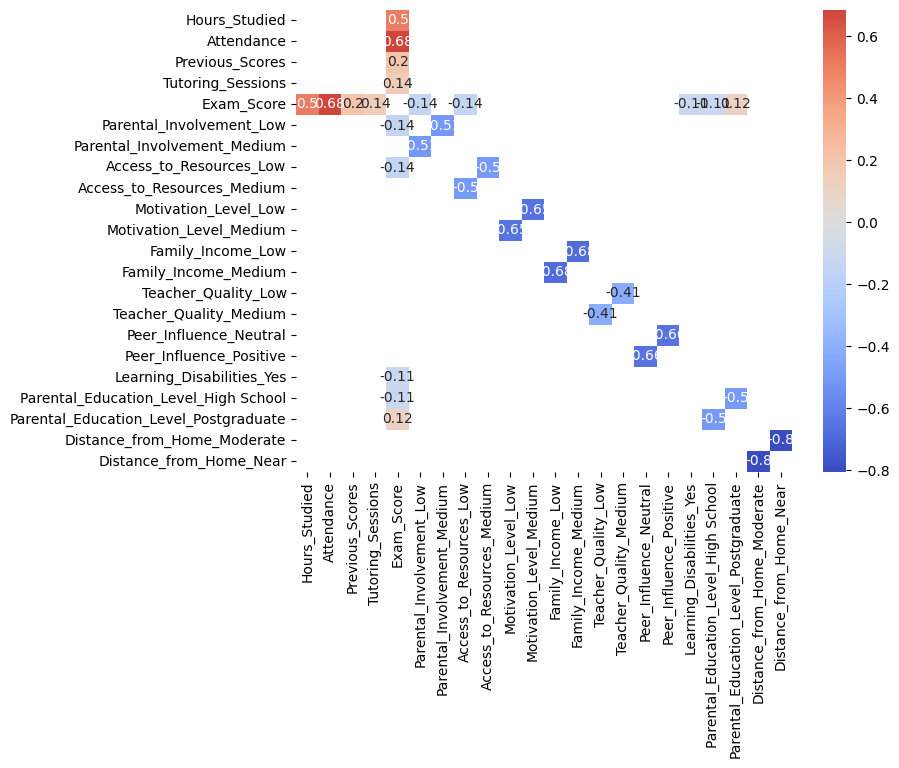

In [29]:
visualizar_correlacao(df_novo, threshold = 0.1, drop_column = None)

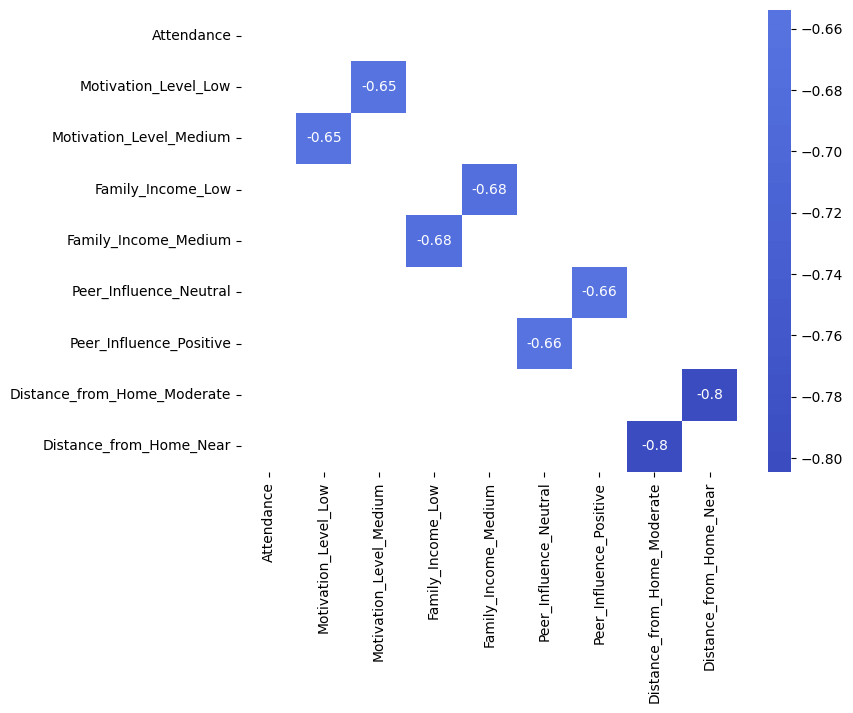

In [30]:
visualizar_correlacao(df_novo, threshold = 0.55, drop_column = 'Exam_Score')

In [31]:
novo_df_final = pd.DataFrame({
    'Exam_Score': df_novo['Exam_Score'],
    'Hours_Studied': df_novo['Hours_Studied'],
    'Attendance': df_novo['Attendance'],
    'Previous_Scores': df_novo['Previous_Scores'],
    'Tutoring_Sessions': df_novo['Tutoring_Sessions'],
    'Learning_Disabilities_Yes': df_novo['Learning_Disabilities_Yes'],
    'Parental_Education_Level_High School': df_novo['Parental_Education_Level_High School'],
    'Parental_Education_Level_Postgraduate': df_novo['Parental_Education_Level_Postgraduate']
})

In [32]:
novo_df_final.head()

,Exam_Score,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate
0,67,23,84,73,0,False,True,False
1,61,19,64,59,2,False,False,False
2,74,24,98,91,2,False,False,True
3,71,29,89,98,1,False,True,False
4,70,19,92,65,3,False,False,False


## Pré-Processamento dos Dados

In [33]:
X = novo_df_final[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 
                   'Learning_Disabilities_Yes', 'Parental_Education_Level_High School', 
                   'Parental_Education_Level_Postgraduate']].values

y = novo_df_final['Exam_Score'].values.reshape(-1, 1)

In [34]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
len(x_treino)

4668

In [36]:
len(y_treino)

4668

In [37]:
len(x_teste)

1168

In [38]:
len(y_teste)

1168

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(x_treino)

StandardScaler()

In [41]:
x_treino_scaled = scaler.transform(x_treino)
x_teste_scaled = scaler.transform(x_teste)

### Versão 1 do Modelo

In [42]:
modelo_v1 = LinearRegression()

In [43]:
modelo_v1.fit(x_treino_scaled, y_treino)

LinearRegression()

In [44]:
y_pred_treino_v1 = modelo_v1.predict(x_treino_scaled)

In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v1))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v1)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v1))

Mean Absolute Error: 1.0658792735498985
Mean Squared Error: 1.7595766802373691
Root Mean Squared Error: 1.326490361908962
R2 Score: 0.8325075574372954


In [46]:
y_pred_teste_v1 = modelo_v1.predict(x_teste_scaled)

In [47]:
df_previsoes = pd.DataFrame({'Valor_Real': y_teste.flatten(), 'Valor_Previsto': y_pred_teste_v1.flatten()})

In [48]:
df_previsoes.head()

,Valor_Real,Valor_Previsto
0,68,68.531917
1,66,67.350697
2,65,66.925893
3,71,70.277533
4,64,64.759822


### Versão 2 do Modelo - Regressão Lasso 

In [49]:
modelo_v2 = Lasso(alpha = 1.0) 

In [50]:
modelo_v2.fit(x_treino_scaled, y_treino)

Lasso()

In [51]:
y_pred_treino_v2 = modelo_v2.predict(x_treino_scaled)

In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v2))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v2)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v2))

Mean Absolute Error: 1.7567362657120515
Mean Squared Error: 4.768975476541953
Root Mean Squared Error: 2.183798405655145
R2 Score: 0.5460457278963853


### Versão 3 do Modelo - RandomForest

In [53]:
modelo_v3 = RandomForestRegressor()

In [54]:
modelo_v3.fit(x_treino_scaled, y_treino)

RandomForestRegressor()

In [55]:
y_pred_treino_v3 = modelo_v3.predict(x_treino_scaled)

In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v3))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v3)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v3))

Mean Absolute Error: 0.43702535500061207
Mean Squared Error: 0.30299570231555556
Root Mean Squared Error: 0.5504504540061308
R2 Score: 0.9711581252258991


In [57]:
%reload_ext watermark
%watermark -a "Pedro Marcello"

Author: Pedro Marcello



In [58]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.13.1
IPython version      : 8.31.0

Compiler    : MSC v.1942 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 3, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [59]:
%watermark --iversions

pandas    : 2.2.3
seaborn   : 0.13.2
sklearn   : 1.6.0
matplotlib: 3.10.0
numpy     : 2.2.1

